# SBD - Mineria de Dades

## EDA

#### LLIBRERIAS

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import prince

##### CARGA DADES

In [7]:

uci_disease = pd.read_csv("/Users/pere amat/CE/SBD/mineria/practica/heart_disease_uci.csv")


#### EXPLORACIÓ INICIAL

In [9]:
#VISUALIZAR BASE DE DATOS
uci_disease.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
#VISUALIZACIÓN , MIN, MAX STD, 
uci_disease.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Podem observar que hi han Hi ha 920 observacions i 16 variables, els quals moltes contenen valors nuls.
Per altra banda observem que hi ha variables de diferents tipus: Numèriques (int64, float64): com age, trestbps, chol.
Categòriques (object): com sex, cp, fbs.

In [12]:
#VISUALIZACIÓN , MIN, MAX STD, 
uci_disease.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
## VISUALIZACIÓN CAMPOS ÚNICOS

uci_disease['cp'].unique()


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [14]:

uci_disease['fbs'].unique()

array([True, False, nan], dtype=object)

In [15]:
## VISUALIZACIÓN CAMPOS ÚNICOS

uci_disease['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
uci_disease['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [17]:
uci_disease['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [18]:
uci_disease['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [19]:
uci_disease['exang'].unique()

array([False, True, nan], dtype=object)

### Gestió de valors mancants:

In [21]:
# Eliminar la columna 'id' (no rellevant)
uci_disease_clean = uci_disease.drop(columns=['id'])



Decidirem si imputar o eliminar registres en funció de la quantitat de valors mancants i la importància de la variable.
Variables amb massa valors mancants poden ser eliminades.

In [23]:
# Calcular porcentaje de valores faltantes
missing_percentage = (uci_disease_clean.isnull().sum() / len(uci_disease_clean)) * 100

# Mostrar columnas con valores faltantes y sus porcentajes
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage[missing_percentage > 0])



Porcentaje de valores faltantes por columna:
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64


### visualització univariada

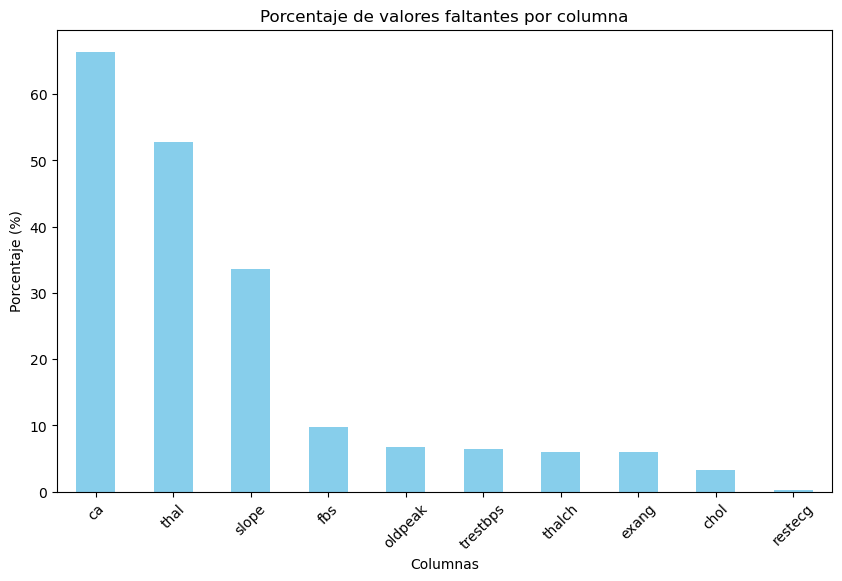

In [25]:
# Gráfico de valores faltantes
missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Porcentaje de valores faltantes por columna')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.show()

### Distribución de una variable cuantitativa (ejemplo: 'age')

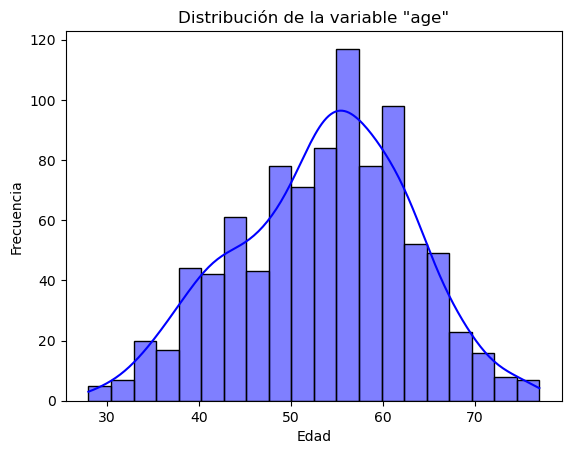

In [27]:


# Histograma de la variable 'age'
sns.histplot(uci_disease_clean['age'], kde=True, color='blue', bins=20)
plt.title('Distribución de la variable "age"')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


#### eliminación campos e imputación otros.

Variables amb molts valors mancants:

slope (33.59%), ca (66.41%), thal (52.83%).
Aquestes variables tenen molts valors nuls i pot ser millor eliminar-les si no es detecten patrons clars.

In [30]:
uci_disease_clean = uci_disease_clean.drop(columns=['slope', 'ca', 'thal'])

### codificación

##### cp: Se aplica LabelEncoder para transformar las categorías en números.
##### fbs: Convertimos directamente a float para manejar valores binarios.
##### dataset: Usamos LabelEncoder para asignar un número único a cada ubicación.
##### restecg: Convertimos las categorías con LabelEncoder y manejamos valores nulos con astype(str).
##### slope: Usamos un mapeo explícito (map) para codificar la pendiente ST.
##### thal: Aplicamos LabelEncoder para convertir categorías a números.
##### exang: Convertimos valores booleanos directamente a 0 y 1 usando astype(float).

In [33]:
# Codificar todas las variables en una sola línea
uci_disease_clean['cp'] = LabelEncoder().fit_transform(uci_disease_clean['cp'])
uci_disease_clean['fbs'] = uci_disease_clean['fbs'].astype(float)
uci_disease_clean['dataset'] = LabelEncoder().fit_transform(uci_disease_clean['dataset'])
uci_disease_clean['restecg'] = LabelEncoder().fit_transform(uci_disease_clean['restecg'].astype(str))
uci_disease_clean['exang'] = uci_disease_clean['exang'].astype(float)
uci_disease_clean['sex'] = uci_disease_clean['sex'].replace({'Male': 1, 'Female': 0})

C:\Users\pere amat\AppData\Local\Temp\ipykernel_22972\3639889512.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uci_disease_clean['sex'] = uci_disease_clean['sex'].replace({'Male': 1, 'Female': 0})


In [34]:
uci_disease_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   920 non-null    int32  
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 75.6 KB


#### matriz de correlación

La matriz de correlación nos servira para de<cidir con las variables que tienen campos vacios y nbo hemos eliminado que metodo de imputacion podemos aplicar, o sino es muy relevante
Variables amb pocs valors mancants (menys del 10%):

trestbps (6.41%), chol (3.26%), fbs (9.78%), restecg (0.22%), thalch (5.98%), exang (5.98%), oldpeak (6.74%).
Aquestes variables poden ser imputades, ja que els valors mancants són relativament baixos.

               age       sex   dataset        cp  trestbps      chol  \
trestbps  0.244253  0.001087  0.021227 -0.023508  1.000000  0.092853   
chol     -0.086234 -0.197281 -0.416648  0.065279  0.092853  1.000000   
fbs       0.233726  0.089191  0.208748 -0.006408  0.160235  0.024847   
restecg  -0.061870  0.065121  0.424797 -0.067363 -0.013455 -0.203287   
thalch   -0.365778 -0.179320 -0.414609  0.300812 -0.104899  0.236121   
exang     0.201626  0.181420  0.223550 -0.370214  0.152328 -0.034557   
oldpeak   0.258243  0.103930  0.053002 -0.181486  0.161908  0.047734   

               fbs   restecg    thalch     exang   oldpeak       num  
trestbps  0.160235 -0.013455 -0.104899  0.152328  0.161908  0.122291  
chol      0.024847 -0.203287  0.236121 -0.034557  0.047734 -0.231547  
fbs       1.000000  0.000798 -0.053386  0.029176  0.055277  0.155533  
restecg   0.000798  1.000000 -0.162750  0.044653 -0.059180 -0.008579  
thalch   -0.053386 -0.162750  1.000000 -0.356439 -0.151174 -0.366265

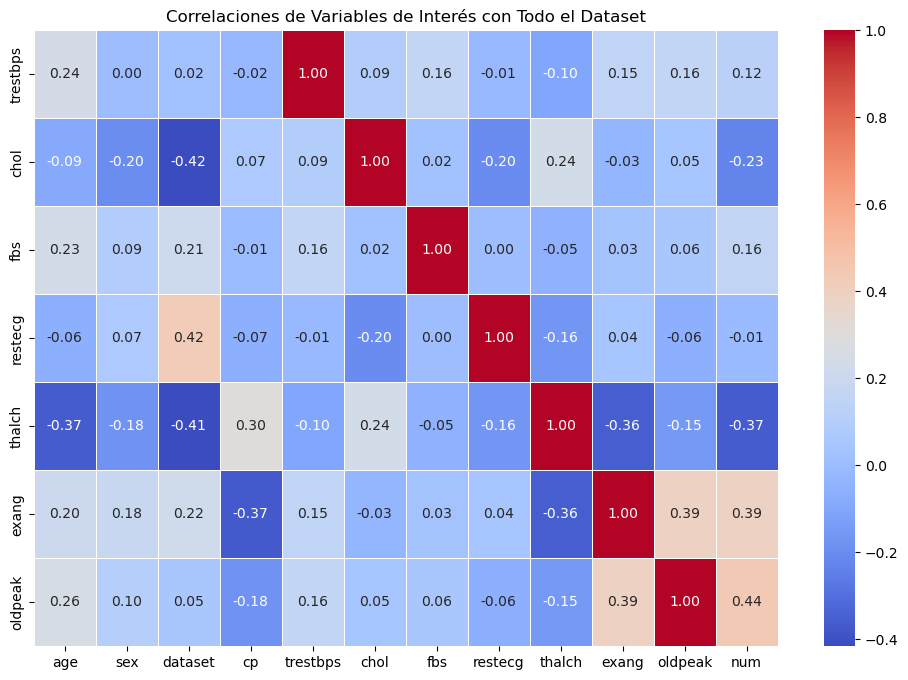

In [37]:
# Calcular la matriz de correlación completa
correlaciones = uci_disease_clean.corr()

# Lista de variables de interés
variables_interes = ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak']

# Filtrar las correlaciones: filas de interés contra todas las columnas
correlaciones_con_todo = correlaciones.loc[variables_interes]

# Mostrar las correlaciones específicas
print(correlaciones_con_todo)

# Opcional: Mostrar un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones_con_todo, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones de Variables de Interés con Todo el Dataset')
plt.show()


### IMPUTACIÓN

Variables amb pocs valors mancants (menys del 10%):

trestbps (6.41%), chol (3.26%), fbs (9.78%), restecg (0.22%), thalch (5.98%), exang (5.98%), oldpeak (6.74%).
Aquestes variables poden ser imputades, ja que els valors mancants són relativament baixos.

### A) Variables continuas:rix

trestbps (6.41%), chol (3.26%), oldpeak (6.74%):
metodos: 
Media/mediana: Es una opción básica, adecuada si las distribuciones no son sesgadas.
Regresión multivariable: Usar las variables con mayor correlación (e.g., age, sex, cp) para predecir los valores faltantes.
KNN imputación: Busca los valores más cercanos basándose en varias características correlacionadas.

In [42]:
uci_disease_imputed =uci_disease_clean.copy()

In [43]:
uci_disease_imputed['trestbps'] = uci_disease_imputed['trestbps'].fillna(uci_disease_imputed['trestbps'].mean())
uci_disease_imputed['chol'] = uci_disease_imputed['chol'].fillna(uci_disease_imputed['chol'].median())
uci_disease_imputed['oldpeak'] = uci_disease_imputed['oldpeak'].fillna(uci_disease_imputed['oldpeak'].median())

In [44]:

data_knn = uci_disease_imputed[['thalch']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_knn)

knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_scaled = knn_imputer.fit_transform(data_scaled)

data_imputed = scaler.inverse_transform(data_imputed_scaled)
uci_disease_imputed['thalch'] = data_imputed

print(uci_disease_imputed.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   920 non-null    int32  
 8   thalch    920 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   920 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 75.6 KB
None


### Variables categóricas/discretas: fbs (9.78%), restecg (0.22%), exang (5.98%):




In [46]:
data_copy = uci_disease_imputed.copy()
data_knn = data_copy[['fbs', 'restecg', 'exang']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_knn)

knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_scaled = knn_imputer.fit_transform(data_scaled)

data_imputed = scaler.inverse_transform(data_imputed_scaled)

data_imputed = pd.DataFrame(data_imputed, columns=data_knn.columns)

data_copy[['fbs', 'restecg', 'exang']] = data_imputed

In [47]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    float64
 7   restecg   920 non-null    float64
 8   thalch    920 non-null    float64
 9   exang     920 non-null    float64
 10  oldpeak   920 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(7), int32(2), int64(3)
memory usage: 79.2 KB


# PCA

##### Aplica PCA a les variables quantitatives:

## 1. Anàlisi de la correlació entre variables

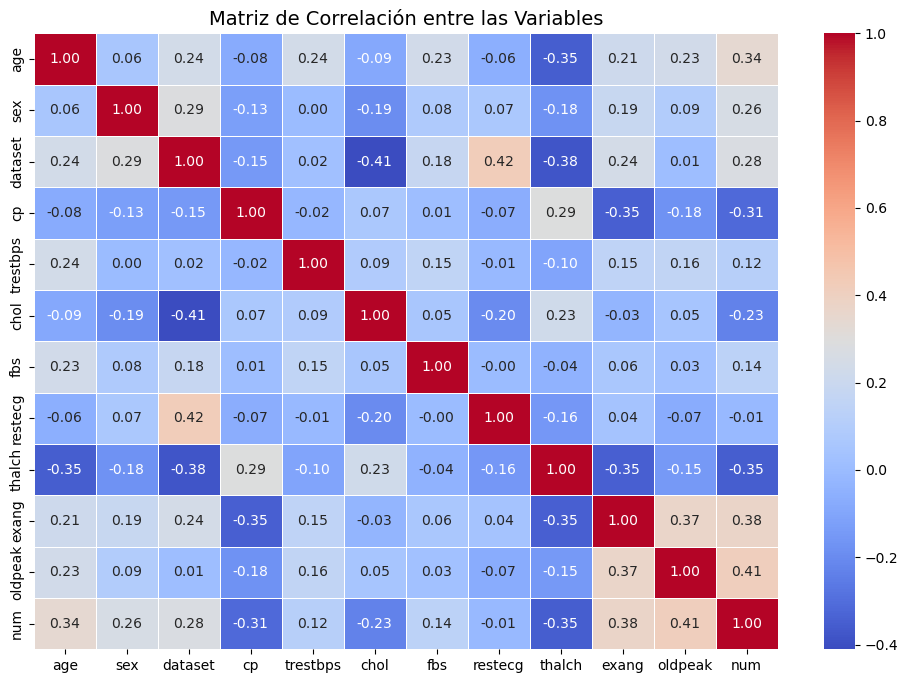

In [51]:
# Calcular la matriz de correlación
correlaciones = data_copy.corr()

# Mostrar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables', fontsize=14)
plt.show()

Las correlaciones más destacadas son entre oldpeak y num (0.41) y entre exang y num (0.39), mostrando relaciones positivas moderadas con la presencia de enfermedad. También, thalach tiene una correlación negativa moderada con num (-0.35), indicando que frecuencias cardíacas más altas están asociadas con menor enfermedad. Estas relaciones resaltan indicadores potencialmente importantes para análisis clínicos.

## 2. Determinar el nombre de components principals

In [54]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    float64
 7   restecg   920 non-null    float64
 8   thalch    920 non-null    float64
 9   exang     920 non-null    float64
 10  oldpeak   920 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(7), int32(2), int64(3)
memory usage: 79.2 KB


In [55]:
data_copy.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,0,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0
1,67,1,0,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,2
2,67,1,0,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1
3,37,1,0,2,130.0,250.0,0.0,2.0,187.0,0.0,3.5,0
4,41,0,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,0


In [56]:
# Seleccionar solo las variables cuantitativas
quantitative_vars = data_copy[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_vars)

# Aplicar PCA 
pca = PCA()
pca.fit(scaled_data)
# Obtener las componentes principales
pca_components = pca.components_

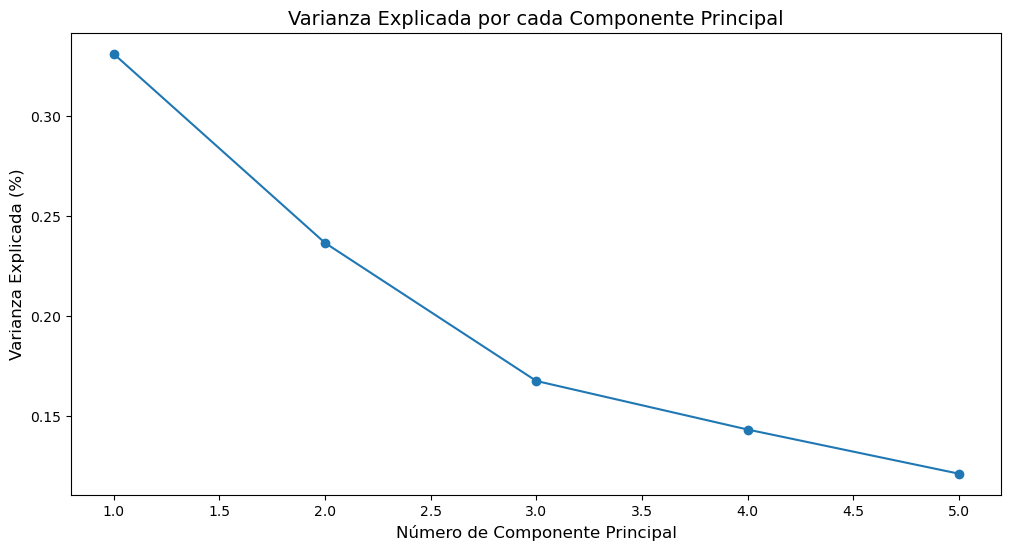

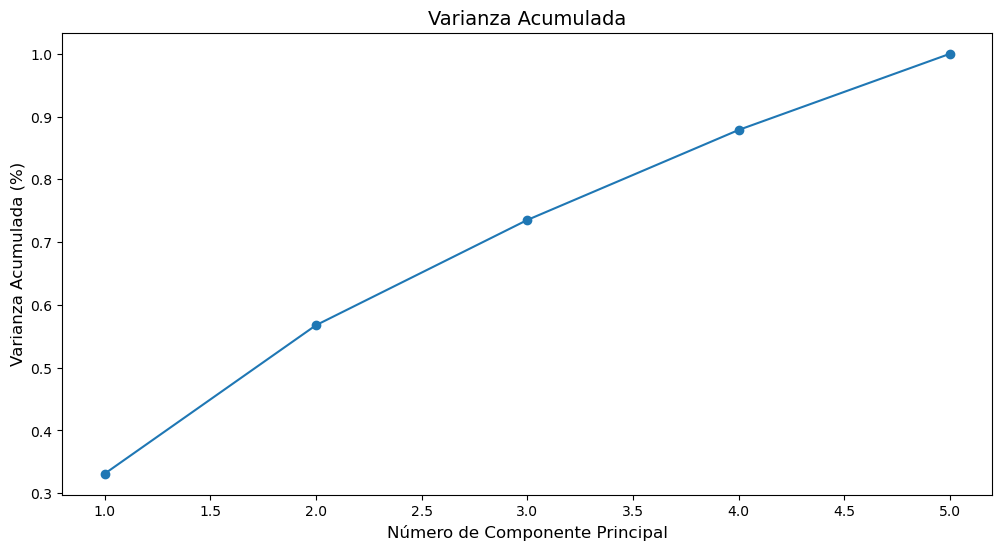

In [57]:
# Visualizar la varianza explicada por cada componente
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Varianza Explicada por cada Componente Principal', fontsize=14)
plt.xlabel('Número de Componente Principal', fontsize=12)
plt.ylabel('Varianza Explicada (%)', fontsize=12)
plt.show()
# Visualizar la varianza acumulada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Varianza Acumulada', fontsize=14)
plt.xlabel('Número de Componente Principal', fontsize=12)
plt.ylabel('Varianza Acumulada (%)', fontsize=12)
plt.show()

Basant-nos en els gràfics:

Mètode del codo (Gràfic de variància explicada per component):
El primer gràfic mostra que el "codo" es troba al tercer component principal. A partir d'aquest punt, el guany d'informació (variància explicada) disminueix significativament, suggerint que els 3 primers components són suficients per representar una gran part de la variabilitat de les dades.

Mètode de la variància acumulada:
El segon gràfic mostra que amb 3 components principals s’aconsegueix explicar més del 70% de la variància acumulada (valor acceptable per retenir informació significativa). Amb 5 components, s’aproxima al 90%, però això afegiria complexitat innecessària.


## Conclusió PCA

És adequat retenir 3 components principals, ja que expliquen una part significativa de la variabilitat (més del 70%) i redueixen la dimensionalitat de les dades de manera eficient. Això facilita el treball amb les dades mantenint una representació coherent de la informació.

In [60]:

# Supongamos que explained_variance_ratio_ es el resultado del PCA
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
umbral = 0.7  # Cambia a 0.90 si necesitas más precisión

# Encuentra el número mínimo de componentes necesarios para alcanzar el umbral
num_componentes = np.argmax(varianza_acumulada >= umbral) + 1

print(f"Número óptimo de componentes: {num_componentes}")

Número óptimo de componentes: 3


## 3. Gràfiques: Indivíds, variables i biplot

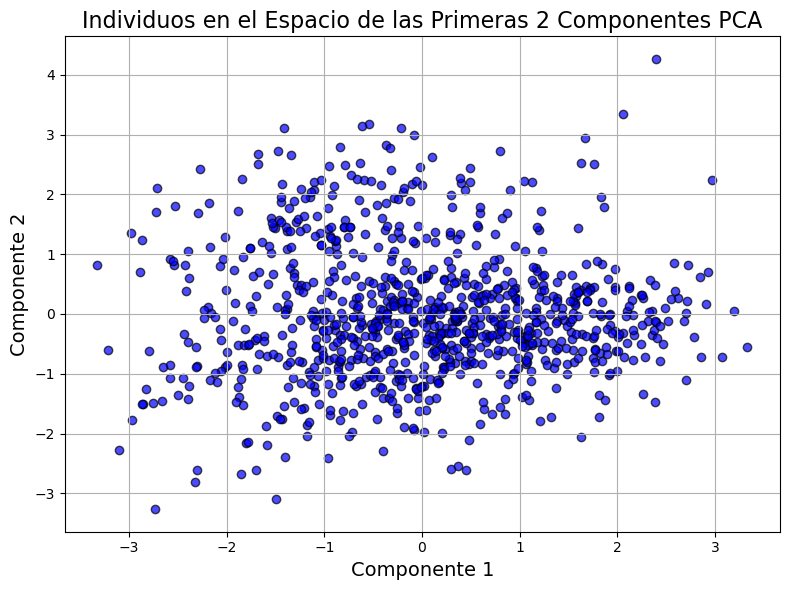

In [63]:
pca_transformed = pca.transform(scaled_data)
# Crear un gráfico bidimensional para las primeras dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_transformed[:, 0],  # Coordenada en la Componente 1
    pca_transformed[:, 1],  # Coordenada en la Componente 2
    color='blue', alpha=0.7, edgecolors='k'  # Estilo de los puntos
)

# Personalizar el gráfico
plt.title('Individuos en el Espacio de las Primeras 2 Componentes PCA', fontsize=16)
plt.xlabel('Componente 1', fontsize=14)
plt.ylabel('Componente 2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

El gràfic mostra com els individus es distribueixen segons les dues primeres components principals del PCA. La PC1 captura la major variabilitat, mentre que la PC2 separa els individus en menor mesura. Es poden observar agrupaments d'individus que podrien indicar patrons subjacents en les dades. Això ajuda a identificar diferències clau entre els individus sense conèixer les variables originals.

#### Gráfico de Variables 

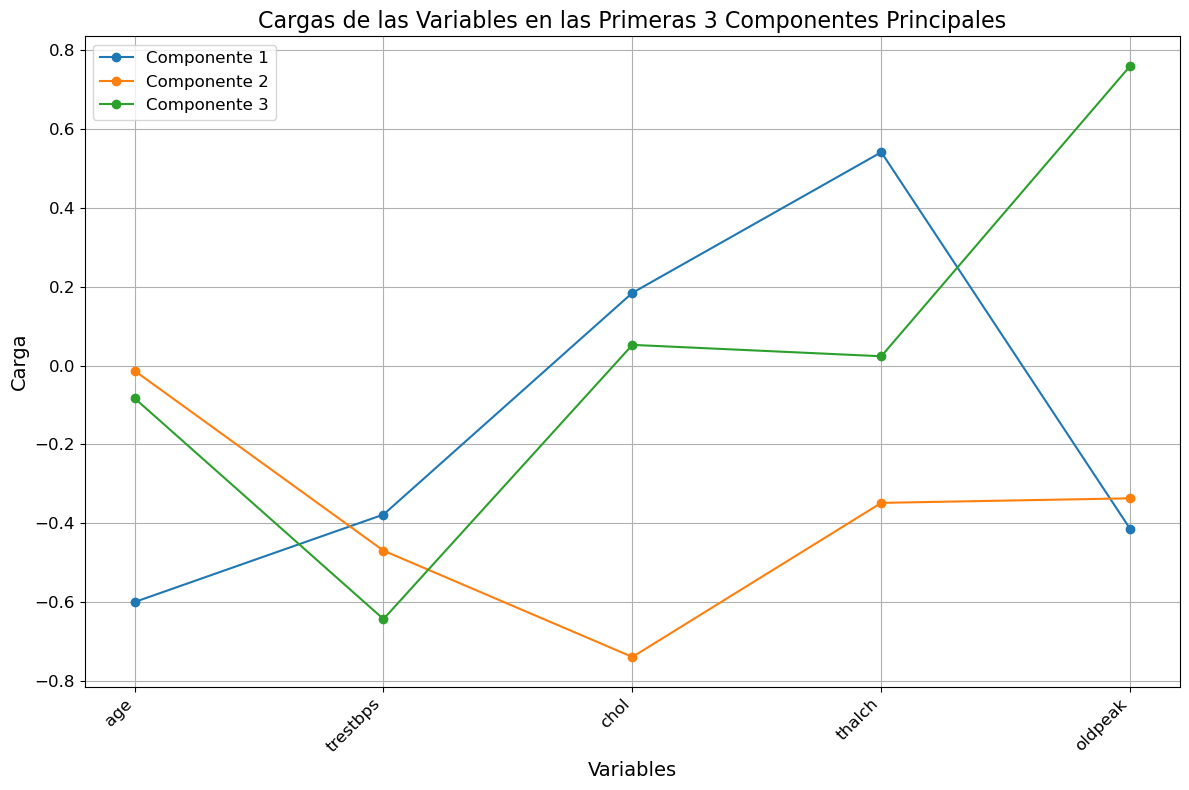

In [65]:
# Extraemos la carga de las variables en las primeras tres componentes
components = pca.components_

# Crear una gráfica de las cargas de las variables en las tres primeras componentes
plt.figure(figsize=(12, 8))
for i, component in enumerate(components[:3]):  # Tres primeras componentes
    plt.plot(quantitative_vars.columns, component, label=f'Componente {i+1}', marker='o', markersize=6)

plt.title('Cargas de las Variables en las Primeras 3 Componentes Principales', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Carga', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

: El PCA mostra que certes variables com age, chol i trestbps tenen una gran influència en les components principals. Aquestes càrregues ajuden a entendre com les variables contribueixen a la variabilitat global del conjunt de dades.

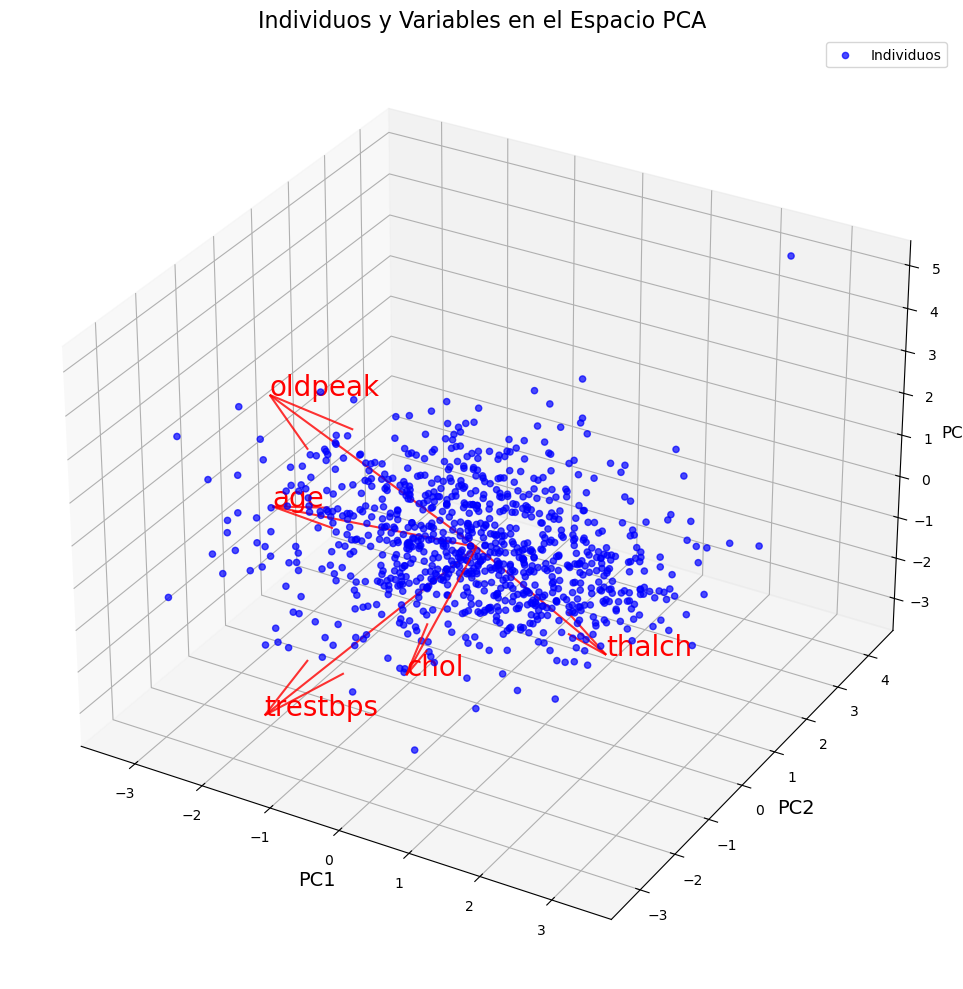

In [67]:
# Transformar los datos al espacio de las 3 primeras componentes
pca_transformed = pca.transform(scaled_data)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar los individuos en el espacio de las 3 primeras componentes
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2], color='blue', alpha=0.7, label='Individuos')

# Graficar las variables como vectores (cargas de las componentes)
# Escalar las flechas para que sean visibles
scale_factor = 5
for i, (x, y, z) in enumerate(pca.components_[:3].T):  # Tomamos las primeras 3 componentes
    ax.quiver(0, 0, 0, x*scale_factor, y*scale_factor, z*scale_factor, color='red', alpha=0.8)
    ax.text(x*scale_factor, y*scale_factor, z*scale_factor, quantitative_vars.columns[i], fontsize=20, color='red')

# Personalizar el gráfico
ax.set_title('Individuos y Variables en el Espacio PCA', fontsize=16)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=12)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Les dues primeres components (PC1 i PC2) capturen la major part de la variabilitat, mentre que la tercera component (PC3) és menys visible. PC1 està associada a oldpeak i age, PC2 a trestbps i chol, i PC3 a thalch. Això mostra com cada variable contribueix a les diferents dimensions de la variabilitat en les dades.

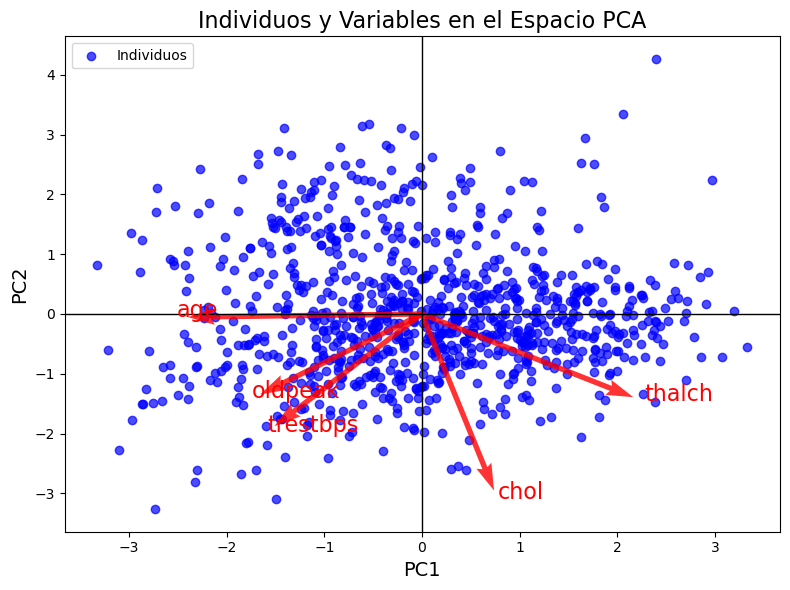

In [69]:
# Transformar los datos al espacio de las 2 primeras componentes
pca_transformed = pca.transform(scaled_data)

# Crear la figura 2D con un tamaño adecuado
plt.figure(figsize=(8, 6))

# Graficar los individuos en el espacio de las 2 primeras componentes
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], color='blue', alpha=0.7, label='Individuos')

# Graficar las variables como vectores (cargas de las componentes)
scale_factor = 4  # Reducir el factor de escala para las flechas
for i, (x, y) in enumerate(pca.components_[:2].T):  # Tomamos las primeras 2 componentes
    plt.quiver(0, 0, x*scale_factor, y*scale_factor, color='red', alpha=0.8, angles='xy', scale_units='xy', scale=1)
    # Ajustamos las etiquetas para que no sobresalgan
    plt.text(x*scale_factor * 1.05, y*scale_factor * 1.05, quantitative_vars.columns[i], fontsize=16, color='red')

# Añadir las líneas de los ejes
plt.axhline(0, color='black',linewidth=1)  # Línea horizontal en y=0
plt.axvline(0, color='black',linewidth=1)  # Línea vertical en x=0

# Personalizar el gráfico
plt.title('Individuos y Variables en el Espacio PCA', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


PC1 està influenciat principalment per age (edat) i thalch (frequència cardíaca màxima).
PC2 està influenciat principalment per chol (colesterol).
Oldpeak i trestbps no tenen gran influència en PC1 ni PC2

Les variables que més contribueixen als eixos principals són:

PC1: age, oldpeak, i trestbps.
PC2: chol i trestbps.
PC3: oldpeak i trestbps.
Les variables amb una representació menys rellevant als nous eixos són:

chol: Té una càrrega important en PC2, però no es representa bé en altres components.
thalch: Té càrregues més petites, indicant que no té una gran influència en els components principals.

## 5. Variables més contribuides

In [71]:
contribution = np.square(pca_components)
contribution = pd.DataFrame(contribution, columns=[f'PC{i+1}' for i in range(len(pca_components))], index=quantitative_vars.columns)
contribution


,PC1,PC2,PC3,PC4,PC5
age,0.359291,0.142609,0.033981,0.292492,0.171626
trestbps,0.000171,0.220050,0.545461,0.121123,0.113196
chol,0.006844,0.412882,0.002749,0.000557,0.576967
thalch,0.135596,0.193820,0.386991,0.151712,0.131880
oldpeak,0.498097,0.030639,0.030818,0.434115,0.006331


Podem observar que en el component 1 la variable que més destaca és oldpeak, cosa que ens sorprèn, ja que en el biplot inicial pensàvem que la variable age era la que millor definia aquest component. En canvi, en el component 2 les contribucions de les variables semblen més lògiques i concorden amb el que es mostra al biplot.

Un possible problema de les components podria ser que la representació en dues dimensions no és suficient per captar la relació completa entre les variables i els components. Així, variables com age, que sembla tenir una gran influència en el component 1, podrien estar contribuint més en altres components que no es veuen clarament en aquesta visualització.

És important destacar que trestbps i thalch tenen una forta contribució en el component 3, cosa que no observem en els components 1 i 2. Això suggereix que aquestes variables podrien estar definint millor una tercera dimensió que no es representa adequadament en el biplot bidimensional.

## 6. Gràfica d'indivíds segons cos²

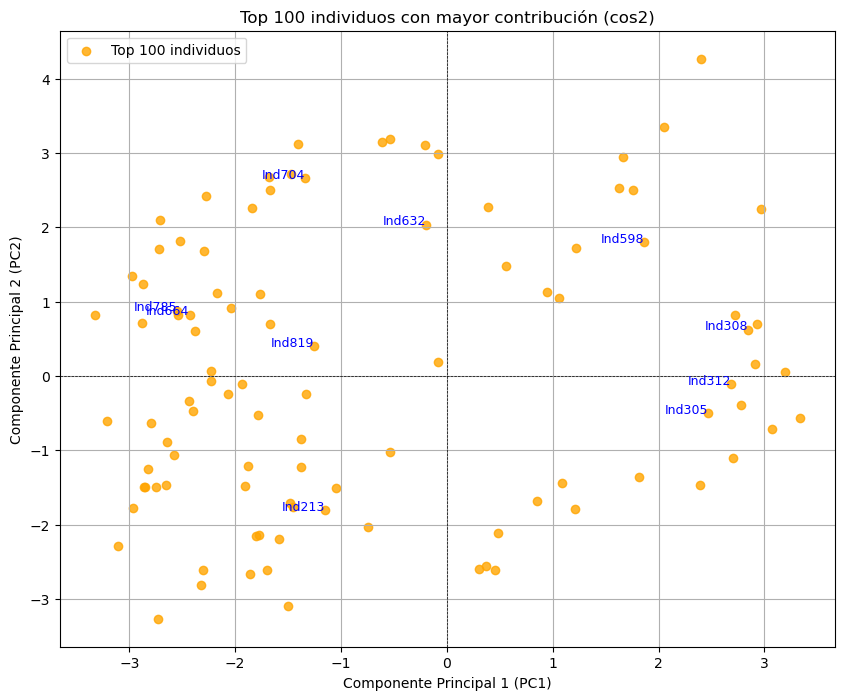

In [73]:
# Proyectar los datos al nuevo espacio de componentes principales
pca_transformed = pca.transform(scaled_data)

# Calcular la contribución (distancia euclidiana al origen) para cada individuo
distances = np.linalg.norm(pca_transformed, axis=1)

# Obtener los 100 individuos más importantes (con mayores distancias)
top_100_indices = np.argsort(distances)[-100:]  # Los 100 más lejanos al origen

# Graficar los 100 individuos más importantes con etiquetas
plt.figure(figsize=(10, 8))

# Representar los puntos
plt.scatter(pca_transformed[top_100_indices, 0], pca_transformed[top_100_indices, 1], 
            alpha=0.8, c='orange', label="Top 100 individuos")

# Etiquetar algunos puntos seleccionados
for i in top_100_indices[:10]:  # Etiquetamos los primeros 10 individuos
    plt.text(pca_transformed[i, 0], pca_transformed[i, 1], 
             f"Ind{i}", fontsize=9, ha='right', color='blue')

# Añadir ejes y título
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("Top 100 individuos con mayor contribución (cos2)")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid()
plt.show()


## MCA

grafica individus

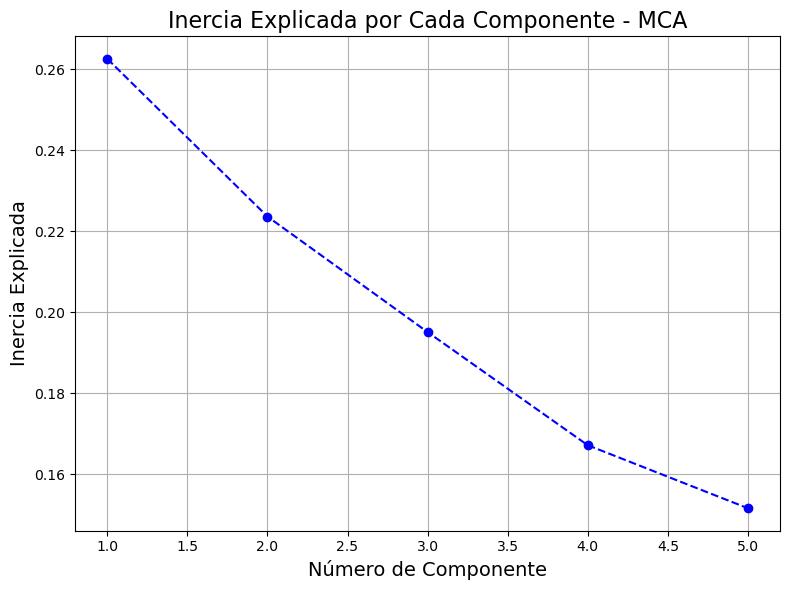

Inercia explicada acumulada: [0.26255423 0.48615968 0.68124576 0.84839817 1.        ]


In [75]:
# Asegúrate de que las variables que vas a usar están codificadas
categorical_columns = ['sex', 'dataset', 'cp', 'restecg', 'exang', 'fbs']
df_mca = data_copy[categorical_columns]

# Realizar el Análisis de Correspondencias Múltiples (MCA)
mca = prince.MCA(n_components=5, n_iter=10, copy=True, engine='sklearn', random_state=42)
mca = mca.fit(df_mca)

# Obtener los valores propios (singular values)
eigenvalues = mca.eigenvalues_

# Calcular la inercia explicada por cada componente (esto es proporcional a los valores propios)
explained_inertia = eigenvalues / eigenvalues.sum()

# Graficar la inercia explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_inertia) + 1), explained_inertia, marker='o', linestyle='--', color='b')
plt.title('Inercia Explicada por Cada Componente - MCA', fontsize=16)
plt.xlabel('Número de Componente', fontsize=14)
plt.ylabel('Inercia Explicada', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Inercia explicada acumulada
explained_inertia_cumulative = explained_inertia.cumsum()
print("Inercia explicada acumulada:", explained_inertia_cumulative)

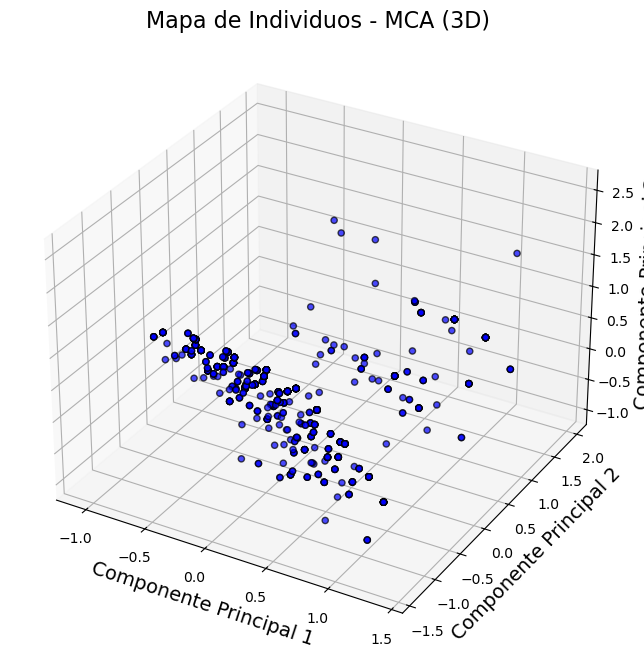

In [77]:

# Obtener las coordenadas de los individuos en las tres primeras dimensiones
individual_coordinates = mca.row_coordinates(df_mca)

# Crear la figura y el objeto 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los individuos en 3D
ax.scatter(individual_coordinates.iloc[:, 0], individual_coordinates.iloc[:, 1], individual_coordinates.iloc[:, 2], 
           alpha=0.7, c='blue', edgecolor='k')

# Título y etiquetas
ax.set_title('Mapa de Individuos - MCA (3D)', fontsize=16)
ax.set_xlabel('Componente Principal 1', fontsize=14)
ax.set_ylabel('Componente Principal 2', fontsize=14)
ax.set_zlabel('Componente Principal 3', fontsize=14)

# Mostrar el gráfico
plt.show()

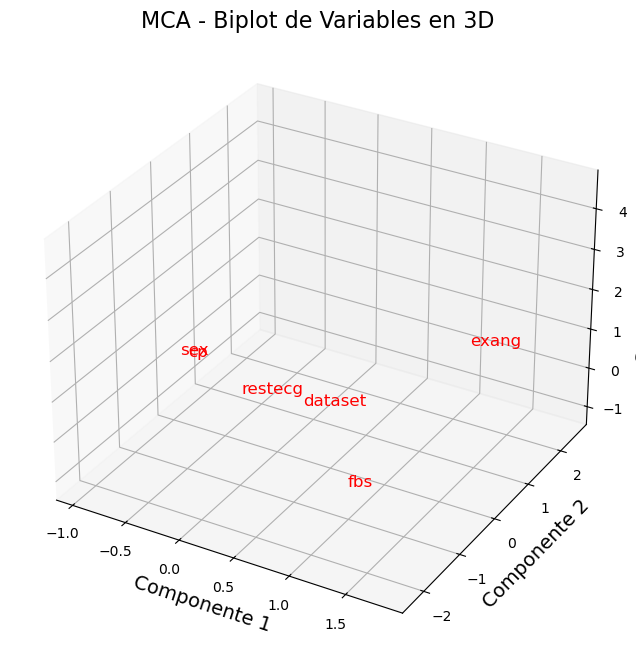

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Obtener las coordenadas de las variables en las tres primeras dimensiones
variable_coordinates = mca.column_coordinates(df_mca)

# Crear la figura y un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar las variables
for i, var in enumerate(categorical_columns):
    # Ajustar las coordenadas de las variables para que no se salgan del gráfico
    ax.text(variable_coordinates.iloc[i, 0],  # Componente 1
            variable_coordinates.iloc[i, 1],  # Componente 2
            variable_coordinates.iloc[i, 2],  # Componente 3
            var, fontsize=12, color='red')

# Personalización del gráfico
ax.set_title('MCA - Biplot de Variables en 3D', fontsize=16)
ax.set_xlabel('Componente 1', fontsize=14)
ax.set_ylabel('Componente 2', fontsize=14)
ax.set_zlabel('Componente 3', fontsize=14)

# Ajustar los límites de los ejes para que todas las etiquetas sean visibles
# Establecemos los límites manualmente según las coordenadas obtenidas
ax.set_xlim([variable_coordinates.iloc[:, 0].min() - 0.1, variable_coordinates.iloc[:, 0].max() + 0.1])
ax.set_ylim([variable_coordinates.iloc[:, 1].min() - 0.1, variable_coordinates.iloc[:, 1].max() + 0.1])
ax.set_zlim([variable_coordinates.iloc[:, 2].min() - 0.1, variable_coordinates.iloc[:, 2].max() + 0.1])

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Obtener las coordenadas de los individuos y las variables
individual_coordinates = mca.row_coordinates(df_mca)
variable_coordinates = mca.column_coordinates(df_mca)

# Crear la figura y el objeto 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los individuos en 3D
ax.scatter(individual_coordinates.iloc[:, 0], individual_coordinates.iloc[:, 1], individual_coordinates.iloc[:, 2],
           alpha=0.7, c='blue', label='Individuos')

# Graficar las variables en 3D con etiquetas
for i, var in enumerate(categorical_columns):
    ax.text(variable_coordinates.iloc[i, 0] * 1.1, 
            variable_coordinates.iloc[i, 1] * 1.1, 
            variable_coordinates.iloc[i, 2] * 1.1, 
            var, fontsize=12, color='red')

# Personalización del gráfico
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.set_title('MCA - Biplot en 3D', fontsize=16)
ax.set_xlabel('Componente 1', fontsize=14)
ax.set_ylabel('Componente 2', fontsize=14)
ax.set_zlabel('Componente 3', fontsize=14)

# Mostrar el gráfico
plt.show()

